In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


### reading data from csv file

In [2]:
data1=pd.read_csv("AAPL.csv")

In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10272 entries, 0 to 10271
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10272 non-null  object 
 1   Open       10272 non-null  float64
 2   High       10272 non-null  float64
 3   Low        10272 non-null  float64
 4   Close      10272 non-null  float64
 5   Adj Close  10272 non-null  float64
 6   Volume     10272 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 561.9+ KB


In [4]:
data1.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100600,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095352,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088353,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090540,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093165,73449600
5,1980-12-19,0.126116,0.126674,0.126116,0.126116,0.098851,48630400
6,1980-12-22,0.132254,0.132813,0.132254,0.132254,0.103662,37363200
7,1980-12-23,0.137835,0.138393,0.137835,0.137835,0.108036,46950400
8,1980-12-24,0.145089,0.145647,0.145089,0.145089,0.113722,48003200
9,1980-12-26,0.158482,0.159040,0.158482,0.158482,0.124219,55574400


In [5]:
data1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,1.027200e+04
mean,12.006819,12.134860,11.877629,12.011191,11.420584,3.353832e+08
std,25.111332,25.388548,24.833693,25.123982,24.816645,3.404297e+08
min,0.049665,0.049665,0.049107,0.049107,0.038490,0.000000e+00
25%,0.276786,0.284375,0.270089,0.276964,0.232579,1.273552e+08
50%,0.456451,0.464286,0.446987,0.455357,0.378405,2.233742e+08
75%,12.687857,12.825715,12.579017,12.687143,10.893390,4.177250e+08
max,156.979996,157.259995,154.389999,156.690002,156.690002,7.421641e+09


### checking null values

In [6]:
data1.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
data1.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

### replacing nan values with 0

In [8]:
#handling missing values
data1=data1.fillna(method='bfill',axis=0).fillna(0)

In [9]:
data1

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100600,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095352,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088353,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090540,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093165,73449600
...,...,...,...,...,...,...,...
10267,2021-09-01,152.830002,154.979996,152.339996,152.509995,152.509995,80313700
10268,2021-09-02,153.869995,154.720001,152.399994,153.649994,153.649994,71115500
10269,2021-09-03,153.759995,154.630005,153.089996,154.300003,154.300003,57808700
10270,2021-09-07,154.970001,157.259995,154.389999,156.690002,156.690002,82278300


In [10]:
date=data1['Date'].head(50)
open=data1['Open'].head(50)
high=data1['High'].head(50)
low=data1['Low'].head(50)

In [11]:
date

0     1980-12-12
1     1980-12-15
2     1980-12-16
3     1980-12-17
4     1980-12-18
5     1980-12-19
6     1980-12-22
7     1980-12-23
8     1980-12-24
9     1980-12-26
10    1980-12-29
11    1980-12-30
12    1980-12-31
13    1981-01-02
14    1981-01-05
15    1981-01-06
16    1981-01-07
17    1981-01-08
18    1981-01-09
19    1981-01-12
20    1981-01-13
21    1981-01-14
22    1981-01-15
23    1981-01-16
24    1981-01-19
25    1981-01-20
26    1981-01-21
27    1981-01-22
28    1981-01-23
29    1981-01-26
30    1981-01-27
31    1981-01-28
32    1981-01-29
33    1981-01-30
34    1981-02-02
35    1981-02-03
36    1981-02-04
37    1981-02-05
38    1981-02-06
39    1981-02-09
40    1981-02-10
41    1981-02-11
42    1981-02-12
43    1981-02-13
44    1981-02-17
45    1981-02-18
46    1981-02-19
47    1981-02-20
48    1981-02-23
49    1981-02-24
Name: Date, dtype: object

In [12]:
open

0     0.128348
1     0.122210
2     0.113281
3     0.115513
4     0.118862
5     0.126116
6     0.132254
7     0.137835
8     0.145089
9     0.158482
10    0.160714
11    0.157366
12    0.152902
13    0.154018
14    0.151228
15    0.144531
16    0.138393
17    0.135603
18    0.142299
19    0.142299
20    0.136719
21    0.136719
22    0.139509
23    0.138951
24    0.146763
25    0.142857
26    0.145089
27    0.146763
28    0.146763
29    0.144531
30    0.143973
31    0.138951
32    0.133929
33    0.127232
34    0.119420
35    0.123326
36    0.127790
37    0.127790
38    0.128348
39    0.122768
40    0.121652
41    0.118304
42    0.117188
43    0.114955
44    0.116629
45    0.121652
46    0.114955
47    0.108817
48    0.109933
49    0.107143
Name: Open, dtype: float64

In [13]:
high

0     0.128906
1     0.122210
2     0.113281
3     0.116071
4     0.119420
5     0.126674
6     0.132813
7     0.138393
8     0.145647
9     0.159040
10    0.161272
11    0.157366
12    0.152902
13    0.155134
14    0.151228
15    0.144531
16    0.138393
17    0.135603
18    0.142857
19    0.142299
20    0.136719
21    0.137277
22    0.140625
23    0.138951
24    0.147321
25    0.142857
26    0.146205
27    0.147879
28    0.147321
29    0.144531
30    0.143973
31    0.138951
32    0.133929
33    0.127232
34    0.119420
35    0.123884
36    0.128348
37    0.128906
38    0.128906
39    0.122768
40    0.122210
41    0.118304
42    0.117188
43    0.114955
44    0.117188
45    0.122768
46    0.114955
47    0.108817
48    0.110491
49    0.107143
Name: High, dtype: float64

In [14]:
low

0     0.128348
1     0.121652
2     0.112723
3     0.115513
4     0.118862
5     0.126116
6     0.132254
7     0.137835
8     0.145089
9     0.158482
10    0.160714
11    0.156808
12    0.152344
13    0.154018
14    0.150670
15    0.143973
16    0.137835
17    0.135045
18    0.142299
19    0.141183
20    0.136161
21    0.136719
22    0.139509
23    0.138393
24    0.146763
25    0.142299
26    0.145089
27    0.146763
28    0.146205
29    0.143973
30    0.142857
31    0.138393
32    0.133371
33    0.126116
34    0.118862
35    0.123326
36    0.127790
37    0.127790
38    0.128348
39    0.121652
40    0.121652
41    0.117746
42    0.116629
43    0.113839
44    0.116629
45    0.121652
46    0.114397
47    0.108259
48    0.109933
49    0.106027
Name: Low, dtype: float64

In [15]:
data1.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

### Data visualisation

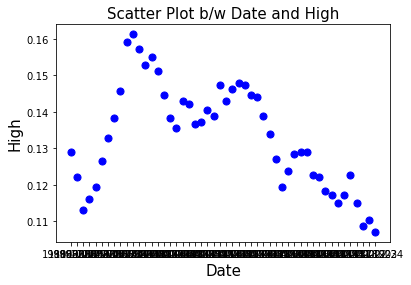

In [16]:
#Data Visualization using Matplotlib
plt.title("Scatter Plot b/w Date and High",fontsize=15)
plt.xlabel("Date",fontsize=15)
plt.ylabel("High",fontsize=15)
plt.scatter(date,high,c='blue',s=50)
plt.show()

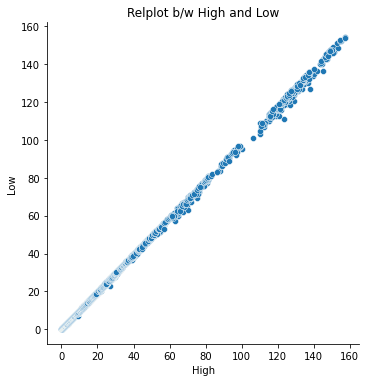

In [17]:
#Data Visualisation Using seaborn
sns.relplot(data=data1,x="High",y="Low")
plt.title("Relplot b/w High and Low")
plt.show()

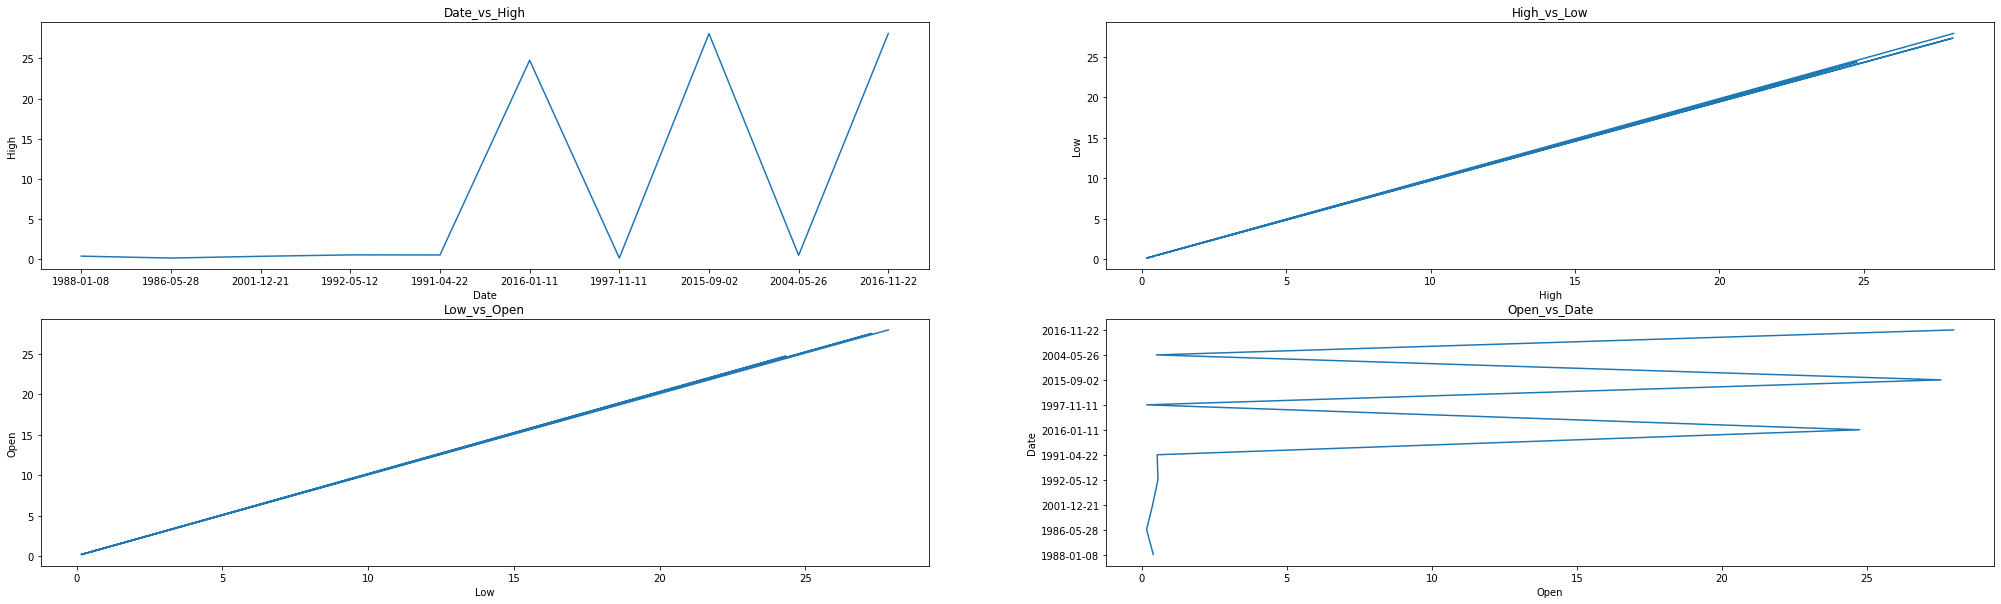

In [18]:
data =data1.sample(10)
fig, axes=plt.subplots(nrows=4, ncols=4,figsize = (35, 10))
x = data['Date']
y = data['High']
plt.subplot(2,2,1)
plt.xlabel("Date")
plt.ylabel("High")
plt.title("Date_vs_High")
plt.plot(x,y)
plt.subplot(2,2,2)
x = data['High']
y = data['Low']
plt.xlabel("High")
plt.ylabel("Low")
plt.title("High_vs_Low")
plt.plot(x,y)
plt.subplot(2,2,3)
x = data['Low']
y = data['Open']
plt.xlabel("Low")
plt.ylabel("Open")
plt.title("Low_vs_Open")
plt.plot(x,y)
plt.subplot(2,2,4)
x = data['Open']
y = data['Date']
plt.xlabel("Open")
plt.ylabel("Date")
plt.title("Open_vs_Date")
plt.plot(x,y)
plt.show()


In [19]:
data1 = data1.drop('Date',axis=1)

In [20]:
X = data1.drop("Volume", axis=1)
y = data1["Volume"]


In [21]:
X.head()

,Open,High,Low,Close,Adj Close
0,0.128348,0.128906,0.128348,0.128348,0.100600
1,0.122210,0.122210,0.121652,0.121652,0.095352
2,0.113281,0.113281,0.112723,0.112723,0.088353
3,0.115513,0.116071,0.115513,0.115513,0.090540
4,0.118862,0.119420,0.118862,0.118862,0.093165


In [22]:
y.head()

0    469033600
1    175884800
2    105728000
3     86441600
4     73449600
Name: Volume, dtype: int64

### Splitting dataset into test and train

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [24]:
len(X_train),len(X_test)

(7190, 3082)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
mod = LogisticRegression()
mod.fit(X_train, y_train)


In [ ]:
LogisticRegressionScore = mod.score(X_test, y_test)

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_mod = mod.predict(X_test)
cf_matrix = confusion_matrix(y_test,y_pred_mod)
cf_matrix

array([[137,  20],
       [ 63,  48]], dtype=int64)

Text(0.5, 1.06, 'Confusion Matrix for Logistic Regression')

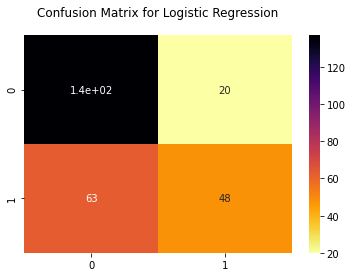

In [30]:
sns.heatmap(cf_matrix, annot=True, cmap='inferno_r')
plt.title('Confusion Matrix for Logistic Regression',fontsize=12, y=1.06)

In [31]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_mod))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77       157
           1       0.71      0.43      0.54       111

    accuracy                           0.69       268
   macro avg       0.70      0.65      0.65       268
weighted avg       0.69      0.69      0.67       268



In [32]:
LogisticRegressionScore*100

69.02985074626866

### Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [34]:
RandomForestClassifierScore = rfc.score(X_test,y_test)

In [35]:
y_pred_rfc = rfc.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_rfc)
cf_matrix

array([[129,  28],
       [ 58,  53]], dtype=int64)

Text(0.5, 1.06, 'Confusion Matrix for Random Forest Classifier')

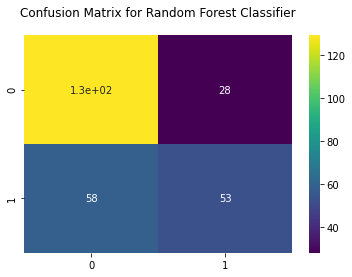

In [36]:
sns.heatmap(cf_matrix, annot=True, cmap='viridis')
plt.title('Confusion Matrix for Random Forest Classifier',fontsize=12,y=1.06)

In [37]:
print(metrics.classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75       157
           1       0.65      0.48      0.55       111

    accuracy                           0.68       268
   macro avg       0.67      0.65      0.65       268
weighted avg       0.68      0.68      0.67       268



In [38]:
RandomForestClassifierScore*100

67.91044776119402

### Decision Tree Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [40]:
DecisionTreeClassifierScore = dtc.score(X_test,y_test)

In [41]:
y_pred_dtc = dtc.predict(X_test)
cf_matrix = confusion_matrix(y_test,y_pred_dtc)
cf_matrix

array([[118,  39],
       [ 56,  55]], dtype=int64)

Text(0.5, 1.06, 'Confusion Matrix for Decision Tree Classifier')

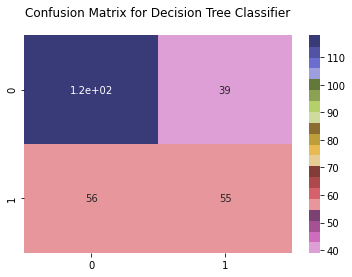

In [42]:
sns.heatmap(cf_matrix, annot=True, cmap='tab20b_r')
plt.title("Confusion Matrix for Decision Tree Classifier",fontsize=12, y=1.06)

In [43]:
print(metrics.classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       0.68      0.75      0.71       157
           1       0.59      0.50      0.54       111

    accuracy                           0.65       268
   macro avg       0.63      0.62      0.62       268
weighted avg       0.64      0.65      0.64       268



In [44]:
DecisionTreeClassifierScore*100

64.55223880597015

In [46]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier()
scores = cross_val_score(rf,X_train,y_train,cv=2,scoring='accuracy')
print("scores :",scores)
print("mean :",scores.mean())
print("standard deviation :",scores.std())

scores : [0.6474359  0.66559486]
mean : 0.6565153763706819
standard deviation : 0.00907947893478439


### Accuracy of Three Machine learning Models

In [47]:
print("Accuracy obtained by LogisticRegressionModel : ",LogisticRegressionScore*100)
print("Accuracy obtained by RandomForestClassifierModel :",RandomForestClassifierScore*100)
print("Accuracy obtained by DecisionTreeClassifierModel :",DecisionTreeClassifierScore*100)

Accuracy obtained by LogisticRegressionModel :  69.02985074626866
Accuracy obtained by RandomForestClassifierModel : 67.91044776119402
Accuracy obtained by DecisionTreeClassifierModel : 64.55223880597015
